## Downloading data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import to_categorical

## Dataset

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/Deep Learning assignment/fashion-mnist_train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Deep Learning assignment/fashion-mnist_test.csv')
print('Training Data size',train.shape)
print('Testing Data size',test.shape)

Training Data size (60000, 785)
Testing Data size (10000, 785)


In [ ]:
y_train=train.iloc[:,0]
X_train = np.array(train.iloc[:,1:])
y_test=test.iloc[:,0]
X_test = np.array(test.iloc[:,1:])

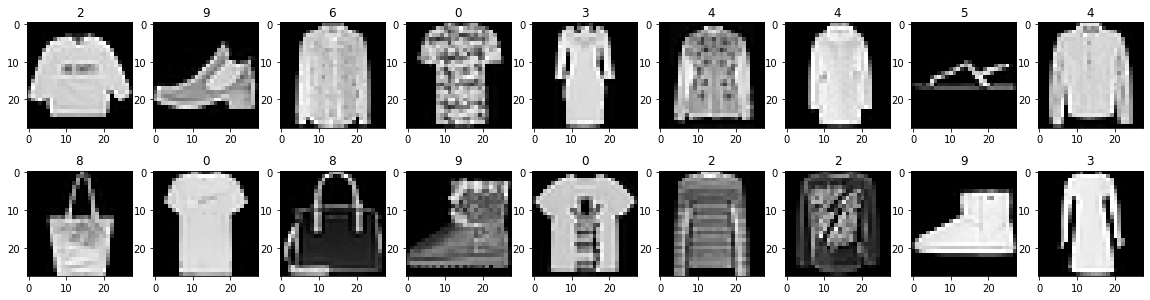

In [ ]:
fig = plt.figure(figsize =(20,5))
for i in range(0,18):  
  plt.subplot(2,9,i+1)
  plt.imshow(X_train[i].reshape(28,28),cmap ='gray')
  plt.title(y_train[i])

In [ ]:
y_train.nunique()

10

## Normalizing pixel values

In [ ]:
X_train = (np.array(train.iloc[:,1:])/255)
X_test = (np.array(test.iloc[:,1:])/255)

## Generating one hot encodings for labels

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## ANN Model

In [ ]:
def ANNModel(n_layers,h,act_func,loss_func,d=784,n_labels=10):
    model = Sequential()
    model.add(Dense(h[0], input_dim=d, activation=act_func))
    for i in range(1,n_layers):
        model.add(Dense(h[i], activation=act_func))
    model.add(Dense(n_labels, activation='softmax'))
    model.compile(optimizer='adam', loss=loss_func,metrics=['accuracy'])
    print(model.summary())
    return model

## Eval Code

In [ ]:
def eval(model,trainX,trainY,testX,testY,n_epochs=20,b=64):
    history=model.fit(trainX,trainY,validation_data=(testX, testY),batch_size=b,epochs=n_epochs)
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epoch')
    plt.ylabel('Accuracy or Loss')
    plt.legend(['Train acc', 'Test Acc','Train loss','Test loss'], bbox_to_anchor =(0.75, 1.15))
    plt.title('Accuracy/Loss Vs Epoch Plots')
    plt.grid()
    plt.show()
    return(history.history['loss'],history.history['val_loss'],history.history['val_accuracy'])

## Comparitive Analysis

In [ ]:
tr_loss=[]
ts_loss=[]
ts_acc=[]

### **Model 1 (BaseLine Model)**

In [ ]:
model = Sequential()
model.add(Dense(10,input_dim=784, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())
n1,n2,n3=eval(model,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model2**

In [ ]:
model1=ANNModel(1,[256],'relu','categorical_crossentropy')
n1,n2,n3=eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model3**

In [ ]:
model1=ANNModel(2,[512,256],'relu','categorical_crossentropy')
n1,n2,n3=eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model4**

In [ ]:
model1=ANNModel(3,[512,512,256],'relu','categorical_crossentropy')
n1,n2,n3=eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model5**

In [ ]:
model1=ANNModel(5,[512,512,512,512,512],'relu','categorical_crossentropy')
n1,n2,n3=eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model6**

In [ ]:
model1=ANNModel(5,[16,16,16,16,16],'relu','categorical_crossentropy')
n1,n2,n3=eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model7**

In [ ]:
model1=ANNModel(5,[512,256,128,64,32],'relu','categorical_crossentropy')
n1,n2,n3=eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model8**

In [ ]:
model1=ANNModel(5,[512,256,128,64,32],'relu','kl_divergence')
n1,n2,n3=eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model9**

In [ ]:
model1=ANNModel(5,[256,256,256,256,256],'relu','categorical_crossentropy')
n1,n2,n3=eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model10**

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
________________________________________________

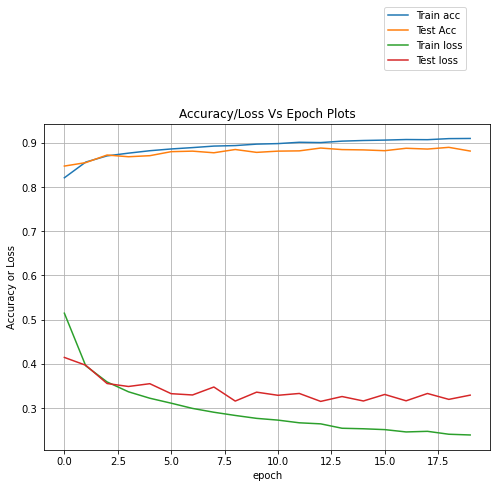

In [ ]:
model1=ANNModel(5,[512,256,128,64,32],'tanh','categorical_crossentropy')
n1,n2,n3=eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model11**

In [ ]:
model1=ANNModel(2,[512,256],'tanh','categorical_crossentropy')
n1,n2,n3=eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model12**

In [ ]:
model1=ANNModel(5,[512,256,128,64,32],'sigmoid','categorical_crossentropy')
n1,n2,n3=eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model13**

In [ ]:
model1=ANNModel(2,[512,256],'sigmoid','categorical_crossentropy')
eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model14**

In [ ]:
model1=ANNModel(3,[256,256,256],'relu','categorical_crossentropy')
n1,n2,n3=eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model15**

In [ ]:
model1=ANNModel(5,[512,256,128,64,128],'relu','categorical_crossentropy')
n1,n2,n3=eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

#### **Model16**

In [ ]:
model1=ANNModel(4,[500,200,75,100],'relu','categorical_crossentropy')
n1,n2,n3=eval(model1,X_train,y_train,X_test, y_test)
tr_loss.append(n1)
ts_loss.append(n2)
ts_acc.append(n3)

### **Plots**

In [ ]:
model_names=[]
for i in range(1,17):
    model_names.append('Model '+str(i))

In [ ]:
fig = plt.figure(figsize = (7,5))
for i in range(16):
    plt.plot(tr_loss[i])
plt.xlabel('epoch')
plt.ylabel('Training Loss')
plt.legend(model_names, loc ="upper right")
plt.title('Train Loss Vs Epoch Plots')
plt.grid()
plt.show()

In [ ]:
fig = plt.figure(figsize = (7,5))
for i in range(16):
    plt.plot(ts_loss[i])
plt.xlabel('epoch')
plt.ylabel('Test Loss')
plt.legend(model_names, loc ="upper right")
plt.title('Test Loss Vs Epoch Plots')
plt.grid()
plt.show()

In [ ]:
fig = plt.figure(figsize = (7,5))
for i in range(16):
    plt.plot(ts_acc[i])
plt.xlabel('epoch')
plt.ylabel('Test Accuracy')
plt.legend(model_names, loc ="upper right")
plt.title('Test Accuracy Vs Epoch Plots')
plt.grid()
plt.show()